In [992]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [993]:
train_path = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/iowa_housing/train.csv"

In [994]:
test_path = "/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/iowa_housing/test.csv"

In [995]:
train = pd.read_csv(train_path)

In [996]:
test = pd.read_csv(test_path)

In [997]:
# usecols = [1, 17, 18, 19, 43, 44, 46, 49, 50, 70, 77, 80]

In [998]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [999]:
print(train["Id"].isnull().sum())

0


In [1000]:
items_dict = {}
# for items in train.columns:
#     print()
#     print("-"+items)
#     print(train[str(items)].isnull().sum())

for items in train.columns:
    items_dict[str(items)] = train[str(items)].isnull().sum()
#print(items_dict)

null_features = []
for k,v in items_dict.items():
    if v > 0:
        null_features.append(k)
print(null_features)

#'LotFrontage'
#'BsmtQual'


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [1001]:
len(null_features)

19

In [1002]:
set(train["HouseStyle"])

{'1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl'}

In [1003]:
set(train["BsmtQual"])

{'Ex', 'Fa', 'Gd', 'TA', nan}

In [1004]:
set(train["BsmtCond"])

{'Fa', 'Gd', 'Po', 'TA', nan}

In [1005]:
set(train['GarageQual'])

{'Ex', 'Fa', 'Gd', 'Po', 'TA', nan}

In [1006]:
set(train["YearBuilt"])

{1872,
 1875,
 1880,
 1882,
 1885,
 1890,
 1892,
 1893,
 1898,
 1900,
 1904,
 1905,
 1906,
 1908,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010}

In [1007]:
train["SalePrice_ln"] = np.log(train["SalePrice"])

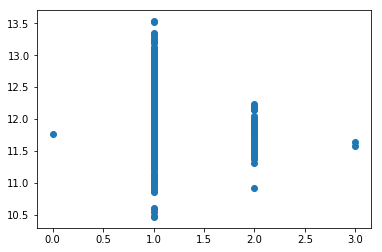

In [1008]:
plt.scatter(x = 'KitchenAbvGr', y = "SalePrice_ln", data = train)
#plt.title("Year built vs Sale Price")
plt.show()

In [1009]:
np.array(train.corr())

array([[ 1.00000000e+00,  1.11564782e-02, -1.06006886e-02, ...,
         7.11794017e-04, -2.19167194e-02, -1.79423824e-02],
       [ 1.11564782e-02,  1.00000000e+00, -3.86346885e-01, ...,
        -2.14070379e-02, -8.42841351e-02, -7.39590173e-02],
       [-1.06006886e-02, -3.86346885e-01,  1.00000000e+00, ...,
         7.44958921e-03,  3.51799097e-01,  3.55878470e-01],
       ...,
       [ 7.11794017e-04, -2.14070379e-02,  7.44958921e-03, ...,
         1.00000000e+00, -2.89225852e-02, -3.72629695e-02],
       [-2.19167194e-02, -8.42841351e-02,  3.51799097e-01, ...,
        -2.89225852e-02,  1.00000000e+00,  9.48373731e-01],
       [-1.79423824e-02, -7.39590173e-02,  3.55878470e-01, ...,
        -3.72629695e-02,  9.48373731e-01,  1.00000000e+00]])

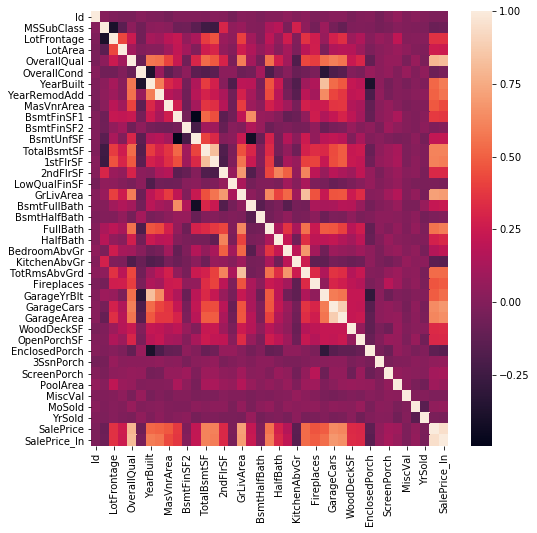

In [1010]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.heatmap(train.corr())
plt.show()

In [1011]:
set(train.corr()) & set(null_features) #very few of the null features come from cts data types

{'GarageYrBlt', 'LotFrontage', 'MasVnrArea'}

In [1012]:
#'LotFrontage' seems important and is missing 
#garage yr built seems important as is missing

train[["SalePrice","MasVnrArea"]].corr()

,SalePrice,MasVnrArea
SalePrice,1.000000,0.477493
MasVnrArea,0.477493,1.000000


In [1013]:
train[["SalePrice",'GarageYrBlt']].corr()

,SalePrice,GarageYrBlt
SalePrice,1.000000,0.486362
GarageYrBlt,0.486362,1.000000


In [1014]:
train[["SalePrice",'LotFrontage']].corr()

,SalePrice,LotFrontage
SalePrice,1.000000,0.351799
LotFrontage,0.351799,1.000000


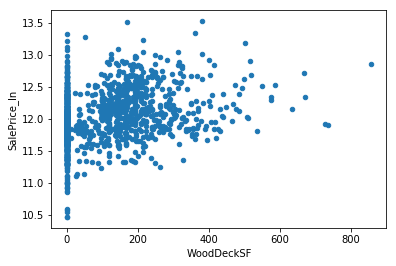

In [1015]:
train.plot(kind = "scatter", x = "WoodDeckSF", y = "SalePrice_ln")
#maybe want to throw this out? "what is VNR area"?

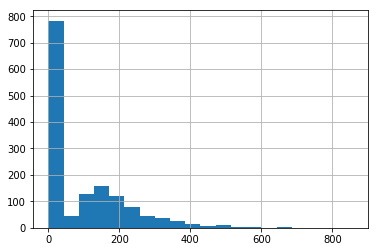

In [1016]:
train["WoodDeckSF"].hist(bins=20)

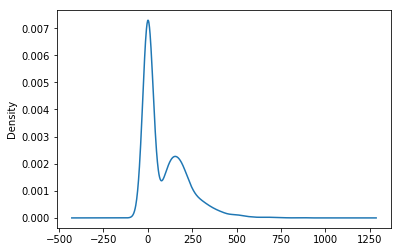

In [1017]:
train["WoodDeckSF"].plot(kind="KDE")

In [1018]:
train.dtypes.value_counts()

object     43
int64      35
float64     4
dtype: int64

In [1019]:
len(train.corr()) #so the 35 + 4 float types makeup the corr matrix 

39

In [1020]:
#train.corr()

In [1021]:
len(set(train.columns) - set(train.corr())) #the set of all "object" features

43

In [1022]:
categorical_data = set(train.columns) - set(train.corr())

In [1023]:
print(categorical_data)

{'LotConfig', 'KitchenQual', 'GarageFinish', 'GarageCond', 'Exterior1st', 'Utilities', 'RoofStyle', 'Functional', 'BsmtCond', 'Exterior2nd', 'RoofMatl', 'SaleCondition', 'Neighborhood', 'MasVnrType', 'FireplaceQu', 'Foundation', 'GarageQual', 'HouseStyle', 'BsmtExposure', 'ExterQual', 'SaleType', 'BsmtFinType1', 'Heating', 'Street', 'BldgType', 'PavedDrive', 'Condition2', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'PoolQC', 'LandContour', 'Fence', 'ExterCond', 'CentralAir', 'LandSlope', 'Condition1', 'LotShape', 'MiscFeature', 'Alley', 'HeatingQC', 'GarageType', 'MSZoning'}


In [1024]:
(set(train.columns) - set(train.corr())) - set(null_features)

{'BldgType',
 'CentralAir',
 'Condition1',
 'Condition2',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [1025]:
#as we can see many of the null features come from the categorical data

In [1026]:
set(train['Neighborhood'])

{'Blmngtn',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker'}

In [1027]:
train["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [1028]:
#real quick
#grab the subset of CTS only data with no missings
#perform PCA on the dataset
#use the resulting features to fit a ridge model
#use CV to test ridge parameter

#try this on the test dataset for kaggle

In [1029]:
X = train[list(((set(train.corr()) | (set(train.columns) - set(train.cor()) - set(null_features))]

SyntaxError: invalid syntax (<ipython-input-1029-013a66fc4c75>, line 1)

In [1030]:
list(((set(train.corr()) | (set(train.columns)) - set(null_features)))))

SyntaxError: invalid syntax (<ipython-input-1030-e7412babf01c>, line 1)

In [1031]:
X = train[list((set(train.corr())  - set(null_features)))]

In [1032]:
X = X.loc[:,(X.columns != "SalePrice") & (X.columns != "SalePrice_ln")]

In [1033]:
X.columns

Index(['YearRemodAdd', 'BedroomAbvGr', 'BsmtFinSF1', 'YrSold', 'LotArea',
       'EnclosedPorch', 'GarageCars', 'FullBath', 'GarageArea', 'MSSubClass',
       'LowQualFinSF', 'MoSold', 'BsmtUnfSF', 'Id', 'TotalBsmtSF', 'MiscVal',
       'OverallQual', 'KitchenAbvGr', 'Fireplaces', '2ndFlrSF', '3SsnPorch',
       'ScreenPorch', 'TotRmsAbvGrd', 'OpenPorchSF', 'YearBuilt', 'PoolArea',
       'BsmtFullBath', '1stFlrSF', 'BsmtHalfBath', 'BsmtFinSF2', 'WoodDeckSF',
       'GrLivArea', 'HalfBath', 'OverallCond'],
      dtype='object')

In [1034]:
from sklearn.decomposition import PCA

In [1035]:
X.shape

(1460, 34)

In [1036]:
X.head()

,YearRemodAdd,BedroomAbvGr,BsmtFinSF1,YrSold,LotArea,EnclosedPorch,GarageCars,FullBath,GarageArea,MSSubClass,...,YearBuilt,PoolArea,BsmtFullBath,1stFlrSF,BsmtHalfBath,BsmtFinSF2,WoodDeckSF,GrLivArea,HalfBath,OverallCond
0,2003,3,706,2008,8450,0,2,2,548,60,...,2003,0,1,856,0,0,0,1710,1,5
1,1976,3,978,2007,9600,0,2,2,460,20,...,1976,0,0,1262,1,0,298,1262,0,8
2,2002,3,486,2008,11250,0,2,2,608,60,...,2001,0,1,920,0,0,0,1786,1,5
3,1970,3,216,2006,9550,272,3,1,642,70,...,1915,0,1,961,0,0,0,1717,0,5
4,2000,4,655,2008,14260,0,3,2,836,60,...,2000,0,1,1145,0,0,192,2198,1,5


In [1037]:
pca = PCA(n_components = 30) #example of 10 components
pca.fit((X - X.mean())/X.std())

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [1038]:
X_pca = pd.DataFrame(pca.transform((X - X.mean())/X.std()))

In [1039]:
#X = (X - X.mean())/X.std()

In [1040]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.223807,0.561317,-0.707356,-2.336100,0.617765,1.167581,-0.455918,0.145830,0.246138,-1.302316,...,0.795999,0.122406,0.234666,0.056564,0.147178,0.545567,-0.341595,0.010804,-0.297848,-0.192831
1,0.021800,-1.236864,0.955256,0.280459,-1.970432,0.327297,3.669993,0.178148,-0.567491,-0.494774,...,-0.500013,0.231870,-0.972716,0.125431,0.301959,-0.809730,-0.861445,0.686253,-0.043190,-0.219359
2,1.467615,0.381235,-0.817930,-1.780799,-0.050855,-0.284466,0.023094,0.032007,0.300632,-1.273934,...,1.138110,-0.698295,0.062107,0.204992,-0.429453,0.339249,-0.396321,0.698992,0.127802,0.333929
3,-0.312709,0.983755,1.379297,0.385215,0.218471,0.413993,-1.498441,2.165746,-0.768592,-0.708905,...,-0.343799,0.920773,-0.344935,-0.128979,-1.335490,1.092591,-0.223242,-0.629823,0.058840,0.412605
4,4.106137,1.021890,-0.098366,-1.526757,-0.054517,-0.595278,0.757384,0.043847,-0.254768,-1.001071,...,0.111121,-0.203989,0.074401,-0.390858,-0.791781,0.278822,-0.132388,-0.150370,0.028866,-0.024086


In [1041]:
X_pca.shape

(1460, 30)

In [1042]:
y = train["SalePrice_ln"]

In [1043]:
#perform train test split 

In [1044]:
from sklearn.model_selection import train_test_split 

In [1045]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2019)

In [1046]:
X.head()

,YearRemodAdd,BedroomAbvGr,BsmtFinSF1,YrSold,LotArea,EnclosedPorch,GarageCars,FullBath,GarageArea,MSSubClass,...,YearBuilt,PoolArea,BsmtFullBath,1stFlrSF,BsmtHalfBath,BsmtFinSF2,WoodDeckSF,GrLivArea,HalfBath,OverallCond
0,2003,3,706,2008,8450,0,2,2,548,60,...,2003,0,1,856,0,0,0,1710,1,5
1,1976,3,978,2007,9600,0,2,2,460,20,...,1976,0,0,1262,1,0,298,1262,0,8
2,2002,3,486,2008,11250,0,2,2,608,60,...,2001,0,1,920,0,0,0,1786,1,5
3,1970,3,216,2006,9550,272,3,1,642,70,...,1915,0,1,961,0,0,0,1717,0,5
4,2000,4,655,2008,14260,0,3,2,836,60,...,2000,0,1,1145,0,0,192,2198,1,5


In [1047]:
from sklearn.linear_model import Ridge

In [1048]:
rreg = Ridge()

In [1049]:
alphas = np.logspace(-4,4,9)

In [1050]:
from sklearn.model_selection import cross_val_score

In [1051]:
def rmse(estimator, X, y):
    preds = estimator.predict(X)
    return np.sqrt(np.mean((preds - y)**2))

In [1052]:
X.shape

(1460, 34)

In [1053]:
rreg_scores = []

for a in alphas:
    rreg.set_params(alpha=a) #note use of .set_params() method
    scores = cross_val_score(estimator = rreg,scoring = rmse, X = X_train, y = y_train, cv = 10)
    rreg_scores.append((np.mean(scores), a))

In [1054]:
rreg_scores

[(0.15601683540353523, 0.0001),
 (0.15601680871424978, 0.001),
 (0.15601654193452466, 0.01),
 (0.15601388540712843, 0.1),
 (0.15598840567191394, 1.0),
 (0.15581278287776693, 10.0),
 (0.1560421530870811, 100.0),
 (0.16686074428142034, 1000.0),
 (0.1853617694523752, 10000.0)]

In [1055]:
rreg = Ridge(alpha = 1)

In [1056]:
rreg.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [1057]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(random_state = 1)

max_depth = [1,5,10,15,25,50,100,200]
rf_scores = []

for num_samples in max_depth:
    rf.set_params(max_depth = num_samples)
    scores = cross_val_score(estimator = rf, 
                             X = X_train, 
                             y = y_train,
                             #note the custom scoring metric
                             cv = 10)
    rf_scores.append((np.mean(scores),num_samples))

In [1058]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 200,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [1059]:
min(rf_scores) #so set max_depth = 25

(0.45500823124187917, 1)

In [1060]:
#X_train

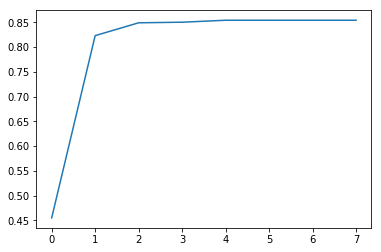

In [1061]:
pd.Series([items[0] for items in rf_scores]).plot()
plt.show()

In [1062]:
#X_train

In [1075]:

rf_scores = []


for num_nodes in [15,25,50,100,200]:
    rf.set_params(max_depth = num_nodes)
    scores = cross_val_score(estimator = rf, 
                             X = X_train, 
                             y = y_train,
                             scoring = rmse, #note the custom scoring metric
                             cv = 10)
    rf_scores.append((np.mean(scores),num_nodes))

In [1076]:
rf_scores  #set num_leafs = 1 , max_depth = 25 

[(0.151741256736032, 15),
 (0.14991255869313364, 25),
 (0.14991408730837302, 50),
 (0.14991408730837302, 100),
 (0.14991408730837302, 200)]

In [1077]:
Z = (X - X.mean())/X.std()

In [1078]:
Z.shape

(1460, 34)

In [1079]:
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2, random_state = 2019)

In [1080]:
X_train["OverallQual"]

1083   -0.071812
380    -0.794879
294    -0.071812
465     0.651256
1294   -0.794879
1350   -0.794879
1129   -0.794879
446    -0.071812
1366    0.651256
1156   -0.794879
169     1.374324
776     0.651256
349     2.097391
118     0.651256
607    -0.794879
633    -0.794879
407    -0.071812
982     0.651256
715    -0.071812
1052   -0.071812
259    -0.794879
1140   -0.794879
1274   -0.794879
791    -0.071812
264    -0.794879
699     0.651256
92     -0.794879
1417    1.374324
1163   -1.517947
1359    2.097391
          ...   
463    -0.071812
978    -1.517947
352    -0.794879
650     0.651256
1006   -0.071812
822     0.651256
577    -0.794879
432    -0.794879
789    -0.071812
1308   -0.794879
792     0.651256
375    -3.687150
133     1.374324
690    -0.071812
976    -1.517947
12     -0.794879
595     1.374324
1016    0.651256
1223   -0.794879
1200   -1.517947
1040   -0.794879
106    -1.517947
396    -0.794879
1295   -0.794879
797    -0.794879
24     -0.794879
190     1.374324
1183   -0.7948

In [1081]:
from sklearn.kernel_ridge import KernelRidge


In [1082]:
kern = KernelRidge(degree = 10)

In [1083]:
#kern.fit(X_train,y_train)

In [1084]:

rf_scores = []


for a in [0.01,0.1,1,10,1000000]:
    kern.set_params(alpha = a)
    scores = cross_val_score(estimator = kern, 
                             X = X_train[["OverallQual","GrLivArea"]], 
                             y = y_train,
                             scoring = rmse,#note the custom scoring metric
                             cv = 10)
    rf_scores.append((np.mean(scores),a))

In [1085]:
rf_scores

[(12.062624920725513, 0.01),
 (12.062619670255794, 0.1),
 (12.06256728979311, 1),
 (12.062055619329339, 10),
 (12.038110230284337, 1000000)]

In [1086]:
#lets redo this by adding in the categorical features

In [1087]:
from keras.models import Sequential

In [1088]:
from keras.layers import Dense

In [1089]:
model = Sequential([
    Dense(34, activation='relu', input_shape=(34,)),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [1090]:
model.compile(optimizer = "sgd",
             loss = 'mean_squared_error',
             metrics = ['accuracy'])

In [1091]:
model.fit(X_train,Y_train,
         batch_size = 32, epochs = 100,
         validation_data=(X_val,Y_val))

ValueError: Input arrays should have the same number of samples as target arrays. Found 1168 input samples and 1022 target samples.

In [1092]:
model.evaluate(X_test,Y_test)

ValueError: Input arrays should have the same number of samples as target arrays. Found 292 input samples and 219 target samples.

In [1093]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

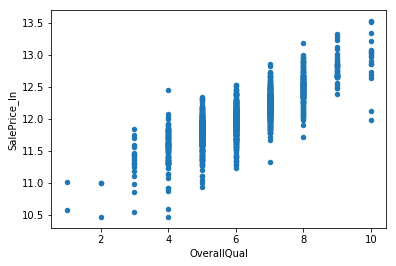

In [1094]:
train.plot(kind = "scatter", x = "OverallQual", y = "SalePrice_ln")

In [1095]:
from sklearn.neighbors import KNeighborsRegressor

In [1102]:
neigh = KNeighborsRegressor()

neigh_scores = []

for num_neigh in [1,10,15,25,50,100]:
    neigh.set_params(n_neighbors = num_neigh)
    scores = cross_val_score(estimator = neigh,
                            X = X_train,
                            y = y_train,
                            scoring = rmse,
                            cv = 10)
    neigh_scores.append((np.mean(scores),num_neigh))

In [1103]:
neigh_scores #without X having the dummies

[(0.22330019717537875, 1),
 (0.17556692091218143, 10),
 (0.17432886611809573, 15),
 (0.17762630312743605, 25),
 (0.1863678628356583, 50),
 (0.20074140209845948, 100)]

In [1104]:
#neigh = KNeighborsRegressor()

In [1099]:
X = train[list((set(train.corr()) | categorical_data) - set(null_features))]


In [1100]:
X.shape #so X is the set of all features with non na features

(1460, 63)

In [1101]:
len(set(null_features))

19

In [555]:
train.shape

(1460, 82)

In [556]:
# for i in X.index.tolist():
#     if 

# X = X.drop([], axis = 0)

In [557]:
X.columns

Index(['LotConfig', 'YrSold', 'EnclosedPorch', 'FullBath', 'GarageCars',
       'GarageArea', 'Utilities', 'MSSubClass', 'RoofStyle', 'Exterior2nd',
       'RoofMatl', 'LowQualFinSF', 'BsmtUnfSF', 'Id', 'TotalBsmtSF',
       'Neighborhood', 'Foundation', 'SaleType', 'KitchenAbvGr', '2ndFlrSF',
       '3SsnPorch', 'ScreenPorch', 'BldgType', 'TotRmsAbvGrd', 'Condition2',
       'PoolArea', 'SalePrice', 'BsmtFullBath', 'Condition1', 'HeatingQC',
       'OverallCond', 'MSZoning', 'YearRemodAdd', 'KitchenQual',
       'BedroomAbvGr', 'BsmtFinSF1', 'LotArea', 'Exterior1st', 'Functional',
       'MoSold', 'SaleCondition', 'HouseStyle', 'ExterQual', 'MiscVal',
       'OverallQual', 'SalePrice_ln', 'Fireplaces', 'Heating', 'Street',
       'PavedDrive', 'OpenPorchSF', 'YearBuilt', 'LandContour', 'ExterCond',
       'CentralAir', 'LandSlope', '1stFlrSF', 'BsmtHalfBath', 'BsmtFinSF2',
       'WoodDeckSF', 'LotShape', 'GrLivArea', 'HalfBath'],
      dtype='object')

In [558]:
categorical_data - set(null_features)

{'BldgType',
 'CentralAir',
 'Condition1',
 'Condition2',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [565]:
####ordered
# "condition1" ?
# "condition2" ?

# "extercond"

# "exterqual"

# "exteriorcond"

# kitchenqual

#salecondition ?

####unordered

#bldgtype
#centralair
#foundation
#functional ?
#heating
#heatingQC
#housingstyle
#Neighborhood
#paveddrive
#roofmatl
#roofstyle

#saletype?

#street


#utilities
#landcontour
#landslope
#lotconfig
#lotshape
#mSZzoning

ordered = ["ExterCond",
           "ExterQual",
           "ExteriorCond",
           "KitchenQual"]

unordered = ["BldgType",
             "CentralAir",
             "Foundation",
             "Heating",
             "HousingStyle",
             "Neighborhood",
             "RoofMatl",
             "RoofStyle"]

In [573]:
set1 = (set(train.corr()) | set(unordered)) - set(null_features)

In [1115]:
if "SalePrice" and "SalePrice_ln" in list(set1):
    print(True)
    
    

True


In [1117]:
X = train.loc[:,list(set1)]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [1120]:
X = X.loc[:,(X.columns != "SalePrice") & (X.columns != "SalePrice_ln")]

In [1122]:
X = pd.get_dummies(X)

In [1124]:
X.shape

(1460, 48)

In [1126]:
Z = (X - X.mean())/X

In [1129]:
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2, random_state = 2019)

In [1131]:
X_train.isnull().sum()

YearRemodAdd         0
BedroomAbvGr         0
BsmtFinSF1           0
YrSold               0
LotArea              0
EnclosedPorch        0
GarageCars           0
FullBath             0
GarageArea           0
MSSubClass           0
LowQualFinSF         0
MoSold               0
BsmtUnfSF            0
Id                   0
TotalBsmtSF          0
MiscVal              0
OverallQual          0
KitchenAbvGr         0
ExteriorCond      1168
Fireplaces           0
2ndFlrSF             0
3SsnPorch            0
ScreenPorch          0
TotRmsAbvGrd         0
OpenPorchSF          0
YearBuilt            0
PoolArea             0
BsmtFullBath         0
1stFlrSF             0
BsmtHalfBath         0
BsmtFinSF2           0
WoodDeckSF           0
GrLivArea            0
HalfBath             0
OverallCond          0
KitchenQual_Ex       0
KitchenQual_Fa       0
KitchenQual_Gd       0
KitchenQual_TA       0
ExterQual_Ex         0
ExterQual_Fa         0
ExterQual_Gd         0
ExterQual_TA         0
ExterCond_E

In [577]:
set(train.corr())

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'SalePrice_ln',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

In [607]:
set([1,2,3]) | set(["#","&"])

{'#', '&', 1, 2, 3}

In [575]:
len(ordered)

4

In [576]:
len(set1)

40

In [560]:
set(train["SaleType"]) #whato?

{'COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD'}

In [561]:
set(train['Heating'])

{'Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'}

In [562]:
set(train["Functional"]) #what??

{'Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ'}

In [563]:
set(train["Foundation"])

{'BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'}

In [564]:
set(train["RoofStyle"])

{'Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'}